**Exercise 6.31**. Simulate a nonstationary time series with $n = 60$ according to the model ARIMA(0,1,1) with $\theta = 0.8$. 

**(a)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$, this is the Dickey-Fuller test and is not augmented.) Comment on the results. 

**(b)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results. 

**(c)** Repeat parts (a) and (b) but use the differences of the simulated series. Comment on the results. (Here, of course, you should reject the unit root hypothesis.) 

**Solution**.

The conclusions for this exercise are more intuitive if we instead use $\theta = -0.8$.  We will solve with the original value of $\theta = 0.8$, obtain insatisfactory conclusions, and then repeat the exercise with $\theta = -0.8$.

In [1]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

In [2]:
def generate_arima(phi=[], d=0, theta=[], n=100):
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [3]:
np.random.seed(0)
Y = generate_arima(d=1, theta=[0.8], n=60)

Observe the series is not obviously nonstationary by visual inspection:

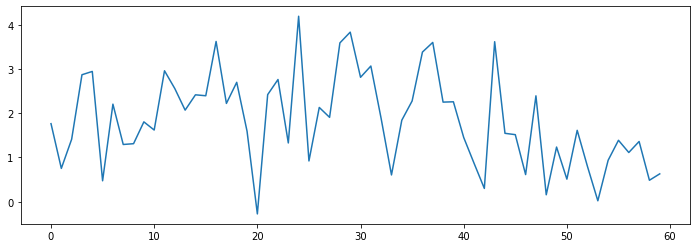

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

**(a)**

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -5.805661
p-value: 4.522909e-07
Used lags: 0
Critical Values:
  1%: -3.546
  5%: -2.912
  10%: -2.594


The Dick-Fuller test does reject nonstationarity (unit root).  This disagrees with the series being nonstationary.

**(b)**

In [7]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.5f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -3.716922
p-value: 0.00388
Used lags: 1
Critical Values:
  1%: -3.548
  5%: -2.913
  10%: -2.594


The Augmented Dick-Fuller test still rejects nonstationarity.

**(c)**

In [8]:
result = adfuller(np.diff(Y), maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -7.838325
p-value: 6.030793e-12
Used lags: 1
Critical Values:
  1%: -3.551
  5%: -2.914
  10%: -2.595


In [9]:
result = adfuller(np.diff(Y))
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -5.969041
p-value: 1.956131e-07
Used lags: 5
Critical Values:
  1%: -3.560
  5%: -2.918
  10%: -2.597


Both the Dick-Fuller nor the Augmented Dick-Fuller tests reject nonstationarity on the time series difference (now in agreement with the model.)

Now, repeating the exercise with $\theta = -0.8$:

In [10]:
np.random.seed(0)
Y = generate_arima(d=1, theta=[-0.8], n=60)

The series is more obviously non-stationary, visually:

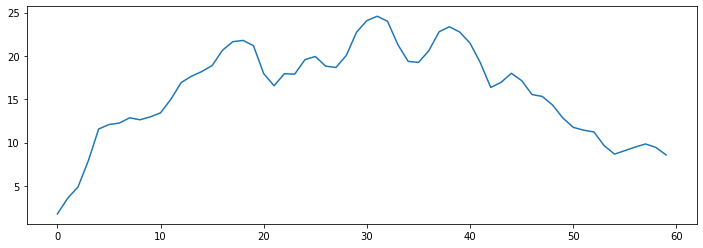

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

In [12]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -2.187538
p-value: 0.211
Used lags: 1
Critical Values:
  1%: -3.548
  5%: -2.913
  10%: -2.594


Now the Dick-Fuller test correctly does not reject stationarity (p-value over 0.05).

In [13]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -0.948111
p-value: 0.772
Used lags: 7
Critical Values:
  1%: -3.563
  5%: -2.919
  10%: -2.597


Augmented Dick-Fuller also does not reject non-stationarity.

In [14]:
result = adfuller(np.diff(Y), maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -4.802493
p-value: 5.379182e-05
Used lags: 1
Critical Values:
  1%: -3.551
  5%: -2.914
  10%: -2.595


In [15]:
result = adfuller(np.diff(Y))
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -4.802493
p-value: 5.379182e-05
Used lags: 1
Critical Values:
  1%: -3.551
  5%: -2.914
  10%: -2.595


For the series of differences, both the Dick-Fuller and the Augmented Dick-Fuller tests reject nonstationarity (correctly).

**Exercise 6.32**. Simulate a stationary time series of length $n = 36$ according to an AR(1) model with $\phi = 0.95$. This model is stationary, but just barely so. With such a series and a short history, it will be difficult if not impossible to distinguish between stationary and nonstationary with a unit root.

**(a)** Plot the series and calculate the sample ACF and PACF and describe what you see.

**(b)** Perform the (augmented) Dickey-Fuller test on the series with $k = 0$ in Equation (6.4.1) on page 128. (With $k = 0$ this is the Dickey-Fuller test and is not augmented.) Comment on the results.

**(c)** Perform the augmented Dickey-Fuller test on the series with $k$ chosen by the software—that is, the “best” value for $k$. Comment on the results.

**(d)** Repeat parts (a), (b), and (c) but with a new simulation with $n = 100$.

**Solution**.

In [16]:
np.random.seed(0)
Y = generate_arima(phi=[0.95], n=36)

**(a)**

In [17]:
from statsmodels.tsa.stattools import acf, pacf

# Function to plot provided autocorrelations
def plot_acf(acf, title='ACF'):
    max_k = len(acf)
    k = range(1, len(acf)+1)
    
    plt.figure(figsize=(12, 4))
    plt.plot(k, acf, marker='o', linestyle='none', color='C0')
    plt.plot([1, max_k], [0, 0], ls=':', color='C0')
    for i_k, i_rho in zip(k, acf):
        plt.plot([i_k, i_k], [0, i_rho], color='C0')
    
    plt.xlabel('Lag')
    plt.ylabel(r'$\rho_k$')
    plt.title(title)
    plt.show()

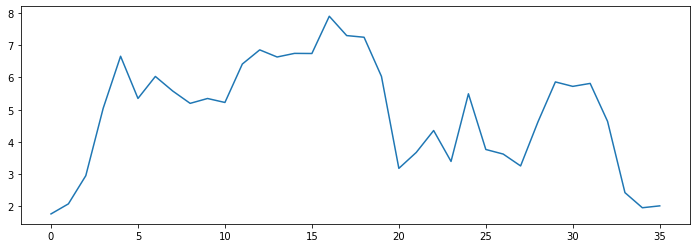

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

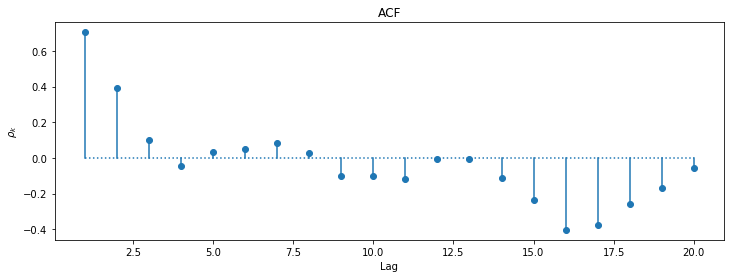

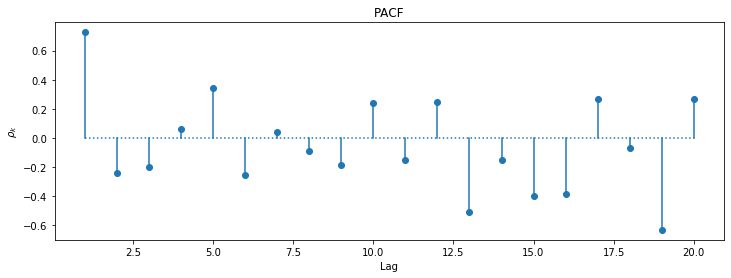

In [19]:
plot_acf(acf(Y, fft=False, nlags=20)[1:], title='ACF')
plot_acf(pacf(Y, nlags=20)[1:], title='PACF')

The PACF suggests an AR(1) model, but the series is not obviously stationary from the timeseries.

**(b)**

In [20]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -2.128863
p-value: 0.233
Used lags: 0
Critical Values:
  1%: -3.633
  5%: -2.949
  10%: -2.613


The Dick-Fuller test fails to reject nonstationarity.

**(c)**

In [21]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -2.128863
p-value: 0.233
Used lags: 0
Critical Values:
  1%: -3.633
  5%: -2.949
  10%: -2.613


The Augmented Dick-Fuller method also fails to reject nonstationarity.

**(d)**

In [22]:
np.random.seed(0)
Y = generate_arima(phi=[0.95], n=100)

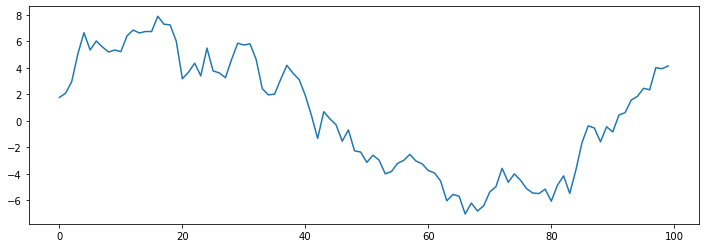

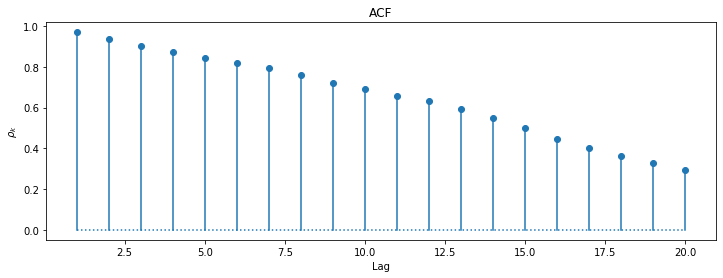

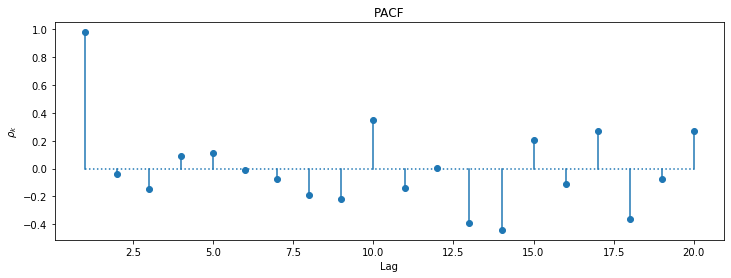

In [23]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.show()

plot_acf(acf(Y, fft=False, nlags=20)[1:], title='ACF')
plot_acf(pacf(Y, nlags=20)[1:], title='PACF')

The series looks more obviously AR(1) now.

In [24]:
result = adfuller(Y, maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -0.992485
p-value: 0.756
Used lags: 0
Critical Values:
  1%: -3.498
  5%: -2.891
  10%: -2.583


In [25]:
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %.3f' % result[1])
print('Used lags: %i' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

ADF Statistic: -0.992485
p-value: 0.756
Used lags: 0
Critical Values:
  1%: -3.498
  5%: -2.891
  10%: -2.583


p-values are even higher on not rejecting nonstationarity now.